<a href="https://colab.research.google.com/github/henney3765/MLDL_studyalone/blob/main/09_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC%EC%9C%84%ED%95%9C%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09-1 순차 데이터와 순환 신경망 -> 코딩 x 책 참조

# 09-1 순환 신경망으로 IMDB 리뷰 분류하기

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)

In [2]:
print(train_input.shape, test_input.shape)

# 25,000개의 샘플이며, 파이썬 리스트로 담긴 넘파이

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

# 리뷰마다 길이가 다름

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


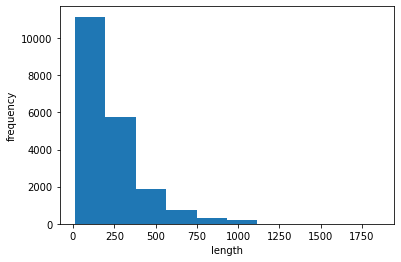

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
train_input[0][-10:]
# 앞부분이 잘림
# pad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자름 -> 뒷부분의 정보가 유용할 것이라 기대하기 때문
#시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences() 함수의  truncating 매개변수의 값을 기본값 'pre'에서 'post'로 변경

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
print(train_seq[5])

# 같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아닌 앞부분에 추가됨
# pad_sequences() 함수의 padding 매개변수의 기본값인 'pre'를 'post'로 바꾸면 샘플의 뒷부분에 패딩을 추가할 수 있음

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [18]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
# one-hot encoding
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

(20000, 100, 500)


In [21]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [22]:
print(np.sum(train_oh[0][0]))

1.0


In [23]:
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 44s 137ms/step - loss: 0.7029 - accuracy: 0.5027 - val_loss: 0.6984 - val_accuracy: 0.5118
Epoch 2/100
313/313 [==============================] - 44s 140ms/step - loss: 0.6893 - accuracy: 0.5372 - val_loss: 0.6763 - val_accuracy: 0.5776
Epoch 3/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6621 - accuracy: 0.6138 - val_loss: 0.6495 - val_accuracy: 0.6394
Epoch 4/100
313/313 [==============================] - 41s 130ms/step - loss: 0.6368 - accuracy: 0.6583 - val_loss: 0.6263 - val_accuracy: 0.6716
Epoch 5/100
313/313 [==============================] - 40s 129ms/step - loss: 0.6123 - accuracy: 0.6896 - val_loss: 0.6046 - val_accuracy: 0.6948
Epoch 6/100
313/313 [==============================] - 41s 131ms/step - loss: 0.5893 - accuracy: 0.7169 - val_loss: 0.5859 - val_accuracy: 0.7166
Epoch 7/100
313/313 [==============================] - 43s 139ms/step - loss: 0.5697 - accuracy: 0.7330 - val_loss: 0.5679 -

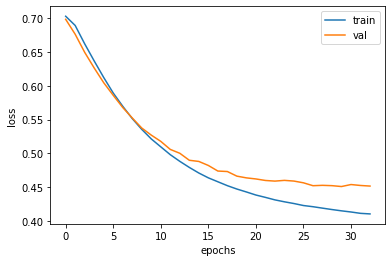

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


## 단어 임베딩을 사용하기

In [40]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [41]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [42]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 58s 181ms/step - loss: 0.6947 - accuracy: 0.5123 - val_loss: 0.6902 - val_accuracy: 0.5334
Epoch 2/100
313/313 [==============================] - 55s 177ms/step - loss: 0.6871 - accuracy: 0.5466 - val_loss: 0.6848 - val_accuracy: 0.5526
Epoch 3/100
313/313 [==============================] - 55s 177ms/step - loss: 0.6766 - accuracy: 0.5953 - val_loss: 0.6715 - val_accuracy: 0.6076
Epoch 4/100
313/313 [==============================] - 55s 176ms/step - loss: 0.6455 - accuracy: 0.6743 - val_loss: 0.6275 - val_accuracy: 0.7052
Epoch 5/100
313/313 [==============================] - 55s 176ms/step - loss: 0.6071 - accuracy: 0.7314 - val_loss: 0.5997 - val_accuracy: 0.7302
Epoch 6/100
313/313 [==============================] - 55s 176ms/step - loss: 0.5793 - accuracy: 0.7513 - val_loss: 0.5757 - val_accuracy: 0.7412
Epoch 7/100
313/313 [==============================] - 55s 176ms/step - loss: 0.5552 - accuracy: 0.7656 - val_loss: 0.5591 -

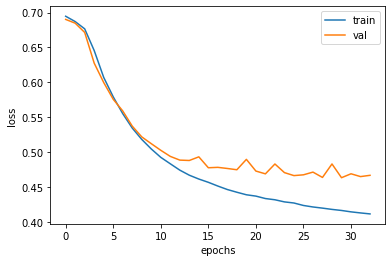

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()